# Titanic : Machine Learning From Disaster

<br>

## Predict survival on the Titanic

<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg" alt="Titanic Disaster" style="width: 720px;"/>

<p style="text-align: center;">
  <small>
    [See <a href="https://www.kaggle.com/c/titanic/overview">Titanic - Machine Learning from Disaster (Kaggle URL)</a>]
  </small>
</p>

## Introduction

<br>

### Object

<br>

This competition can make you dive into ML competitions and familiarize your self with how to solve Kaggle problem.

<br>

This competition's object is so simple : Create Machine Learning algorithm that predicts which passenegers survived in the ship.

On April 15, 1912, Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone onboard, resulting in the death of 1,502 out of 2,224 passengers and crew. (The lifeboat has s capacity of only 1,178 people only. So, only 706 people were rescued.)

<br>

### Data Fields from Titanic)

<br>

 * Survived : 0 = died, 1 = survived

<br>

 * Pclass : Ticket class for passengers
   - 1st = Upper
   - 2nd = Middle
   - 3rd = Lower

<br>

 * Sex : gender of passengers (composed of male and female)

<br>

 * Age : Passenger's age (if age less than 1, it's fractional)

<br>

 * Sibsp : The sibsp defines family relations in this way.
   - Sibling = brother, sister, stepbrother, stepsister
   - Spouse = husband, wife

<br>

 * Parch : The parch defines family relations 
   - Parent = mother, father
   - Child = daughter, son, stepdaughter, stepson

<br>

 * Ticket : Number of ticket
 
 <br>
 
 * Fare : Fare fee of Titanic
 
 <br>
 
 * cabin : Cabin number
 
 <br>
 
 * embarked : Port of Embarkation 
   - C = Cherbourg
   - Q = Queenstown
   - S = Southampton
   
   <br>
   
### Evaluation

<br>

 Our goal is to predict whether the passengers in test.csv have died or not individually. (Use Classifier)
 
 <br>

 Your score is the percentage of passengers you correctly predict. This is known as accuracy.
 
 <br>

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

 <br>

TP = True positive; FP = False positive; TN = True negative; FN = False negative

### Import CSV file by using Pandas (Load Data)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
train.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print(test.shape)
test.head(3)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Test dataset has only 11 columns, 1 less than train. That is "Survived" column and it is equal to our goal y_train(label).

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 - There is some **NaN** data in Age, Cabin columns. And if we want to use for ML, we have to fill in data.
 - Also Name, Sex, Ticket columns are type of **Object**. So, it also would change for ML, if we use.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

 - **NaN** data in Age, Cabin, Fare columns.
 - Some of object column
 
 <br>
 
 **Conclusion**
 
 <br> 
 
 Not only train, but also test, I don't use the Cabin column because there is too much NaN data.

### Exploratory Data Analysis (EDA)

In [9]:
def barchart(column):
    print(sns.countplot(data=train, x = column, hue = "Survived"))
    print(pd.pivot_table(train, index=column, values = "Survived"))

#### 1) Sex

AxesSubplot(0.125,0.125;0.775x0.755)
        Survived
Sex             
female  0.742038
male    0.188908


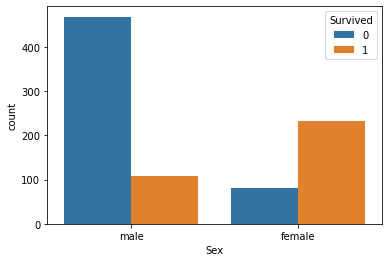

In [10]:
barchart("Sex")

  The chart shows that female passengers are overwhelmingly more likely to survive than male passengers. The survival rate of male is 18.9% and survival rate of female is 74.2%. Rate of male differs almost 4 times than female in pivot table.

### 2) Pclass

<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w" alt="Titanic Disaster" style="width: 720px;"/>

<p style="text-align: center;">
  <small>
    [See the structure of Titanic]
  </small>
</p>

We can find a necessary factor(feature vector) by above figure.

<br>

**Conclusion** 

<br>

Pclass is key feature because the ship was sank from bottom where third class rooms located.

AxesSubplot(0.125,0.125;0.775x0.755)
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


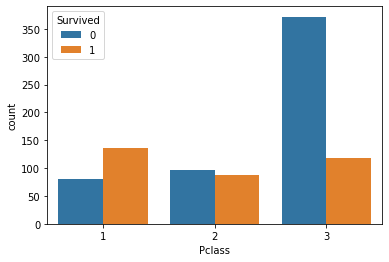

In [11]:
barchart("Pclass")

The chart shows that 
  1. 1st class is more likely survived than other class.
  
  
  2. 2nd class is similar to survived and died passengers.
  
  
  3. 3rd class is more likely dead than other class.

### 3) Embarked

AxesSubplot(0.125,0.125;0.775x0.755)
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


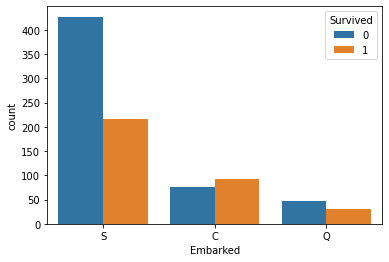

In [12]:
barchart("Embarked")

The chart shows that 

<br>

Boarding at Cherbourg(C) is more likely to survive, and boarding at Southampton(S) is more likely to die. 

<br>

- The largest number of passengers on board in Southampton(S), but that much of them die. Nearly twice the number of survivors is believed to die.

<br>

- The number of people aboard from Cherbourg(C) is relatively small compared to Southampton(S), but the number of survivors is higher than the number of deaths.

<br>

- People on board in Queenstown(Q) are slightly more likely to die, but there are not many passengers in the first place.

###  Age & Fare

이번에는 조금 다른 데이터 시각화 방식으로 두 개의 컬럼의 상관관계를 분석해보겠습니다. 분석하고 싶은 컬럼은 나이(Age)와 운임요금(Fare) 입니다. 두 컬럼이 어떤 상관관계가 있는지를 분석하고 싶다면, seaborn의 [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) 을 사용할 수 있습니다.

<Figure size 1296x864 with 0 Axes>

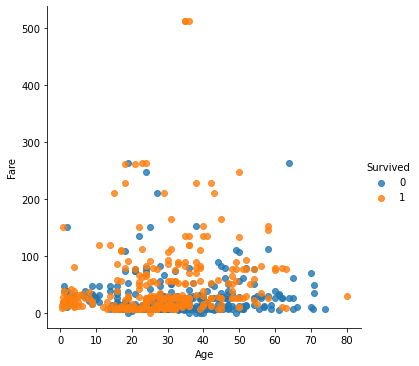

In [13]:
plt.figure(figsize = (18,12))
sns.lmplot(data = train, x = "Age", y = "Fare", hue = "Survived", fit_reg = False)

lmplot을 보는 방법은 간단합니다. 

  * 특정 위치에 오렌지색 점이 몰려있다면, 그 부분에 있는 승객은 생존할 확률이 높다는 것을 알 수 있고
  * 정 반대로 특정 위치에 파란색 점이 몰려있다면, 그 부분에 있는 승객은 생존 확률이 낮다는 것을 알 수 있습니다.
  
다만 아쉽게도 위 그래프에서는 특정 위치에 오렌지색 점이나 파란색 점이 몰려있지 않습니다.

이유를 알아보기 위해 자세히 살펴보면, 그래프의 상단부(운임요금 $500 이상)에 오렌지색 점이 세 개 있는 것을 알 수 있습니다. 이렇게 전체 데이터에서 동떨어진 몇몇 데이터를 아웃라이어(outlier)라고 합니다. 데이터 시각화를 할 때는 언제나 이런 아웃라이어를 제거해줘야 데이터를 더 자세히 볼 수 있습니다.

In [14]:
low_fare = train[train["Fare"] < 500]

train.shape, low_fare.shape
# low_fare 데이터가 train 데이터보다 3개 적은 것을 확인할 수 있는데 (891 > 888),

((891, 12), (888, 12))

<Figure size 1296x864 with 0 Axes>

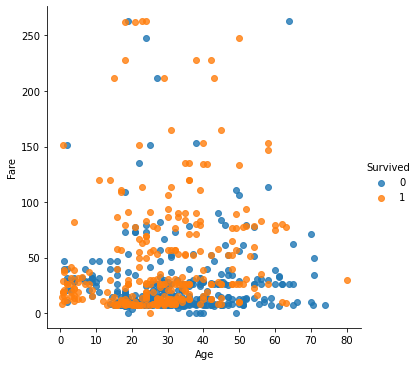

In [15]:
plt.figure(figsize = (18,12))
sns.lmplot(data = low_fare, x = "Age", y = "Fare", hue = "Survived", fit_reg = False)

아웃라이어를 제거한 새로운 lmplot을 보면, 운임요금을 더 많이 낼 수록 사망자보다 생존자가 더 많아진다는 사실을 알 수 있습니다. 더 정확히 이야기하자면,

  * 50달러 이상, 100달러 이상, 200달러 이상을 기준으로 생존자와 사망자의 비율이 크게 차이나기 시작하며
  * 운임요금과 나이간의 특정한 상관관계는 보이지 않는 것 같습니다.
  
경우에 따라서는 더 많은 데이터를 아웃라이어라고 간주하고 이를 제거한 뒤 시각화를 할 수 있습니다. 가령 이번에는 운임요금이 100달러 이상인 데이터를 아웃라이어로 간주하겠습니다.

In [16]:
low_low_fare = train[train["Fare"] < 100]

train.shape, low_fare.shape, low_low_fare.shape

((891, 12), (888, 12), (838, 12))

<Figure size 1296x864 with 0 Axes>

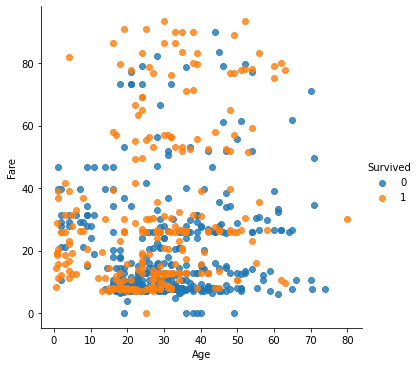

In [17]:
plt.figure(figsize = (18,12))
sns.lmplot(data = low_low_fare, x = "Age", y = "Fare", hue = "Survived", fit_reg = False)

결과를 자세히 살펴보면, 나이가 10세 이하인 승객은 생존 확률이 높으며, 이 중에서도 운임요금을 20달러보다 적게 지불한 승객은 생존 확률이 확연히 높다는 것을 알 수 있습니다.

### SibSp, Parch

다음으로 분석할 컬럼은 SibSp와 Parch입니다. 앞서 설명드린대로 SibSp는 "나와 함께 타이타닉호에 탑승한 형제&자매와 배우자의 총 인원 수", Parch는 "나와 함게 타이타닉호에 탑승한 부모&자식의 총 인원 수" 입니다.

SibSp와 Parch는 얼핏 다른 컬럼처럼 보이지만, 실제로는 둘 다 가족 관계를 나타내는 컬럼으로 볼 수 있습니다. 그러므로 SibSp와 Parch를 더하면 가족의 총 인원 수(FamilySize)가 나옵니다.


In [18]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train[["FamilySize", "SibSp", "Parch"]].head()

,FamilySize,SibSp,Parch
0,2,1,0
1,2,1,0
2,1,0,0
3,2,1,0
4,1,0,0


가족 수(FamilySize)를 구했으면 이를 seaborn의 countplot으로 시각화 해보겠습니다.

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

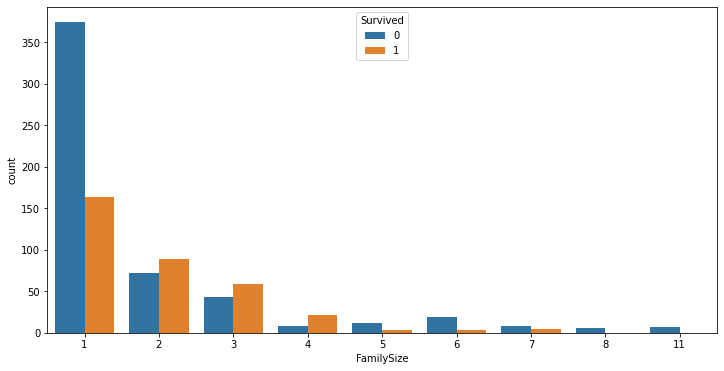

In [19]:
plt.figure(figsize = (12,6))
sns.countplot(data=train, x="FamilySize", hue="Survived")

결과를 자세히 살펴보면 다음과 같은 패턴이 있다는 것을 알 수 있습니다.

  * 타이타닉호에 혼자 탑승한 경우(FamilySize == 1) 생존 확률이 굉장히 낮습니다.
  * 타이타닉호에 적당한 인원의 가족이 함께 탑승한 경우 (2 <= FamilySize <= 4) 생존 확률이 상대적으로 높다는 것을 알 수 있습니다.
  * 하지만 타이타닉호에 탑승한 가족의 인원 수가 너무 많은 경우 (FamilySize >= 5) 생존 확률이 매우 낮다는 것을 알 수 있습니다.

이러한 숫자 컬럼은 구역을 나눠서 countplot으로 분석하면 조금 더 명확하게 결과를 확인할 수 있습니다.

In [20]:
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"
train.loc[(train["FamilySize"] >= 2) & (train["FamilySize"] < 5) , "FamilyType"] = "Small"
train.loc[train["FamilySize"] >= 5 , "FamilyType"] = "Big"

train[["FamilySize", "FamilyType"]].head()

,FamilySize,FamilyType
0,2,Small
1,2,Small
2,1,Single
3,2,Small
4,1,Single


<AxesSubplot:xlabel='FamilyType', ylabel='count'>

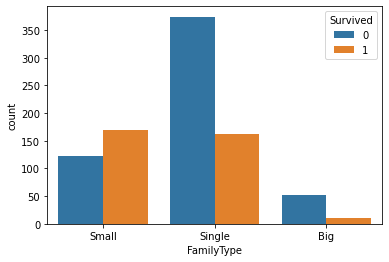

In [21]:
sns.countplot(data=train, x="FamilyType", hue="Survived")

In [22]:
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Single,0.303538
Small,0.578767


분석 결과 혼자 탑승했을 경우(Single) 생존률이 30.3%, 핵가족(Nuclear)인 경우 생존률이 57.8%, 그리고 대가족(Big)인 경우 경우 생존률이 16.1%밖에 되지 않는다는 것을 알 수 있습니다.

### Name

다음으로 분석할 컬럼은 승객 이름(Name)입니다. 승객의 이름은 얼핏 살펴보면 굉장히 분석하기 까다로워 보이지만, 실은 매우 간단한 패턴으로 이루어져 있습니다. 일단 ```,```과 ```.```을 기준으로

  1. ```,```의 앞에 있는 부분이 성(SurName)이며,
  2. ```,```과 ```.``` 사이에 있는 부분은 승객의 호칭(Title)입니다.
  3. 마지막으로 ```.``` 뒤에 있는 부분은 이름(FirstName) 입니다.
  
가령 ```Braund, Mr. Owen Harris``` 이라는 이름의 승객은, 1) Braund라는 성을 가진, 2) Mr라는 호칭을 가진, 3) Owen Harris 라는 이름을 가진 승객으로 해석할 수 있습니다.

In [23]:
train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [24]:
def get_title(Name):
    return Name.split(",")[1].split(".")[0]

train["Name"].apply(get_title).unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

여기에서 우리는 호칭(Title)만을 분리한 뒤, 주요 호칭별 승객의 생존률을 시각화 해보겠습니다.

---------------

타이타닉호의 승객들은 굉장히 다양한 호칭을 갖고 있습니다. 우리가 일반적으로 알고 있는 ```Mr```, ```Mrs```, ```Miss```는 물론, ```Master```(이 당시는 결혼하지 않은 남성을 [Master]( https://en.wikipedia.org/wiki/English_honorifics#Common_titles)라고 호칭했습니다), ```Sir```(남자의 존칭), ```Lady```(여성의 존칭), ```the Countess```(백작 부인) 등도 존재합니다. 하지만 여기서 마이너한 호칭(```Sir```, ```Lady```, ```the Countess```, etc)은 제외하고 1) ```Mr```, 2) ```Mrs```, 3) ```Miss```, 4) ```Master``` 이렇게 네 가지 주요 호칭만 시각화 해보겠습니다.

In [25]:
# 호칭을 저장하는 컬럼은 없으므로 "Title"이라는 새로운 컬럼을 만듭니다.
# Name에 "Mr"가 포함되어 있으면 Title 컬럼에 "Mr"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"

# Name에 "Miss"가 포함되어 있으면 Title 컬럼에 "Miss"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Miss"), "Title"] = "Miss"

# Name에 "Mrs"가 포함되어 있으면 Title 컬럼에 "Mrs"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Mrs"), "Title"] = "Mrs"

# Name에 "Master"가 포함되어 있으면 Title 컬럼에 "Master"이라는 값을 넣어줍니다.
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)
train[["Name", "Title"]].head()

(891, 15)


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

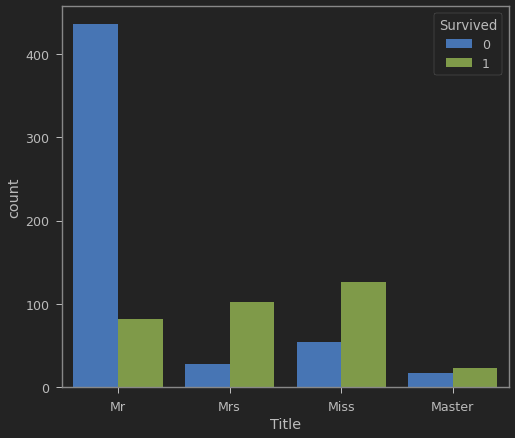

In [29]:
sns.countplot(data=train, x="Title", hue="Survived")

분석 결과 여성(```Mrs```, ```Miss```)의 성별은 우리가 이전에 분석한대로 생존률이 매우 높으며, 성인 남성(```Mr```)의 경우에도 우리가 이전에 분석한대로 생존률이 매우 낮다는 걸 알 수 있습니다.

여기서 눈여겨 볼 점은, 결혼하지 않은 남성(```Master```)입니다. 이 호칭을 보유한 사람은 남성임에도 불구하고 생존률이 상대적으로 높습니다. 그 뜻은, 호칭(Title)이 ```Master```인 사람은 성별(Sex)이 남성(male)임에도 불구하고 생존률이 높을 것이다.라고 추측할 수 있습니다.

이번에는 [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)로 호칭(Title) 컬럼을 분석해보겠습니다.

In [27]:
pd.pivot_table(train, index="Title", values="Survived")

,Survived
Title,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


In [31]:
train["Title"].isnull().sum()

24

분석 결과 호칭이 ```Mr```인 승객의 생존률은 15.8%밖에 되지 않지만, ```Miss```인 승객의 생존률은 70%, ```Mrs```인 승객의 생존률은 79%, 그리고 결정적으로 ```Master```인 승객의 생존률은 57.5%로 매우 높다는 것을 알 수 있습니다.

### Preprocessing

분석이 끝났으면, 이제 본격적으로 테스트 데이터의 생존자/사망자를 예측하는 작업을 진행하겠습니다.

데이터를 **의사결정나무(Decision Tree)** 계열의 머신러닝(Machine Learning) 알고리즘에 넣기 위해서는, 데이터를 머신러닝 알고리즘이 이해할 수 있는 형태로 변환해줘야 합니다. 이 과정을 전문용어로 **전처리(Preprocessing)**라고 합니다.

[scikit-learn](scikit-learn.org) 에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건은 다음과 같습니다.

1. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다.
1. 데이터에 빈 값이 없어야 한다.

여기서는 타이타닉 데이터에 있는 세 컬럼(**Sex**, **Fare**, **Embarked**)을 전처리하는 과정에 대해서 보여드립니다.


### Encode Sex

먼저 성별(Sex) 컬럼을 전처리 합니다.

우리는 기본적인 영어 단어의 의미를 숙지하고 있기 때문에 male(남성)과 female(여성)이 어떤 것을 뜻하는지 알고 있습니다. 하지만 Decision Tree는 내부에서 수학과 통계학으로 돌아가는 알고리즘이므로 male과 female의 의미를 알지 못합니다. 때문에 성별(Sex) 컬럼을 Decision Tree가 이해할 수 있는 방식으로 바꿔줘야 할 필요가 있습니다.

앞서 설명드린대로, scikit-learn의 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건 중 하나는 모든 데이터는 숫자로 구성되어 있어야 한다, 즉 숫자면 어떻게든 들어간다 입니다. 그러므로 우리는 성별(Sex) 컬럼을 숫자로 바꿔줄 것입니다.

성별 컬럼을 전처리하는 가장 쉬운 방법은 male은 0으로, female은 1로 바꿔주는 것입니다. 이를 전문 용어로 인코딩(Encoding)이라고 합니다.

In [37]:
# Exchange "male" : 0, "female" : 1 and adding the column "Sex_encoded"

train.loc[train["Sex"] == "male", "Sex_encoded"] = 0
train.loc[train["Sex"] == "female", "Sex_encoded"] = 1

train[["Sex", "Sex_encoded"]].head()

,Sex,Sex_encoded
0,male,0.0
1,female,1.0
2,female,1.0
3,female,1.0
4,male,0.0


In [38]:
# Exchange test.csv also like above

test.loc[test["Sex"] == "male", "Sex_encoded"] = 0
test.loc[test["Sex"] == "female", "Sex_encoded"] = 1

test[["Sex", "Sex_encoded"]].head()

,Sex,Sex_encoded
0,male,0.0
1,female,1.0
2,male,0.0
3,male,0.0
4,female,1.0


### Fill in missing fare
앞서 설명드린대로, [scikit-learn](scikit-learn.org)의 머신러닝 알고리즘에 데이터를 넣을 땐 언제나 데이터에 값이 채워져 있어야 합니다. 만일 데이터에 **NaN**(Not a Number)이라는 값이 있다면 이는 비어있다는 의미이며, 이 데이터를 머신러닝 알고리즘에 넣으면 에러가 발생합니다.

타이타닉 데이터에 운임요금(Fare) 컬럼을 살펴보면, train 데이터에는 빈 값이 없지만 test 데이터에는 딱 하나 빈 값이 있다는 것을 확인할 수 있습니다. (1044번 승객, Storey, Mr. Thomas) 그러므로 운임요금(Fare) 컬럼을 DecisionTree에 넣기 위해서는 1044번 승객의 운임요금 값을 다른 값으로 채워줘야 합니다.

In [40]:
print(train["Fare"].isnull().sum())
test["Fare"].isnull().sum()

0


1

In [41]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


운임요금(Fare)이 비어있는 값을 채우는 가장 일반적인 방법은 **train 데이터의 운임요금(Fare)의 평균(mean)을 집어넣는 것입니다**. (```train["Fare"].mean()```) 하지만 전체 test 데이터중에 단 하나의 값만 비어있기 때문에, 평균이 아닌 적당한 값을 집어넣어도 정확도의 손해 없이 잘 동작할 것 같습니다.

그러므로 편리하게 test 데이터의 빈 운임요금(Fare) 값은 0으로 채우도록 하겠습니다.

In [43]:
train["Fare_fill"] = train["Fare"].copy()
test["Fare_fill"] = test["Fare"].copy()

test.loc[test["Fare"].isnull(), "Fare_fill"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fill"]]

,Fare,Fare_fill
152,NaN,0.0


### Encode Embarked

그 다음은 선착장(Embarked)을 전처리하겠습니다.

선착장(Embarked)도 성별(Sex)과 마찬가지로 인코딩(Encoding) 대상입니다. 사람인 우리도 **C**, **S**, **Q**가 어떤 의미인지 설명을 들어야 할 수 있는데, 수학과 통계학으로 돌아가는 Decision Tree가 이해할 리 만무하겠죠. 그러므로 선착장(Embarked) 컬럼도 Decision Tree가 이해할 수 있는 방식으로 바꿔줘야 합니다.

앞서 설명드린대로 Decision Tree에 데이터를 넣기 위해서는 모든 데이터가 숫자로 구성되어 있어야 합니다. 이 설명을 참고한다면 선착장(Embarked)을 다음과 같이 인코딩 할 수 있습니다.

  * C == 0
  * S == 1
  * Q == 2
  
하지만 이런 방식으로 선착장을 인코딩 할 경우, Decision Tree는 다음과 같은 오해를 할 수 있습니다.

"어 S가 1이고 Q가 2라면, 그럼 2 * S == Q 인가? 내지는 S + S == Q 인가?"

하지만 S(Southampton)와 Q(Queenstown)은 전혀 다른 지역이며, 두 지역을 더하거나 곱한다고 같아지는 것은 말이 되지 않습니다.
  
그러므로 이 경우에는, 1) C, S, Q를 숫자로 변환해주되, 2) 세 값에 특정 연산(덧셈, 뺄셈, 곱셈, 나눗셈 등)을 한다고 동일해지는 현상이 나오지 않도록 인코딩 해줘야 합니다. 우리는 이 방식을 [원 핫 인코딩(One Hot Encoding)](https://minjejeon.github.io/learningstock/2017/06/05/easy-one-hot-encoding.html)이라고 합니다. 원 핫 인코딩을 통해 선착장(Embarked)을 인코딩 하면 다음과 같은 결과가 나옵니다.

  * C == [1, 0, 0]
  * S == [0, 1, 0]
  * Q == [0, 0, 1]

이제 C, S, Q를 더하거나 곱하거나 빼고 나눠도 같아질 일은 없을 겁니다.

파이썬에서는 매우 간단한 방법으로 One Hot Encoding을 할 수 있습니다. 여기서 편의를 위해 프로그래밍 언어의 관례(Convention)를 빌려올텐데, 프로그래밍 언어에서 True는 1로, False는 0으로 간주합니다. (즉, True == 1, False == 0 입니다) 이 관례를 활용하면 다음과 같이 선착장(Embarked)을 One Hot Encoding 할 수 있습니다.

  * C == [True, False, False]
  * S == [False, True, False]
  * Q == [False, False, True]

이제 이 관례를 활용해 선착장(Embarked) 컬럼을 One Hot Encoding 해보겠습니다. 코드는 다음과 같습니다.

In [48]:
# One Hot Encoding

train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,S,False,True,False
1,C,True,False,False
2,S,False,True,False
3,S,False,True,False
4,S,False,True,False


In [49]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,Q,False,False,True
1,S,False,True,False
2,Q,False,False,True
3,S,False,True,False
4,S,False,True,False


### Age

다음으로 전처리할 컬럼은 나이(Age) 컬럼입니다.

나이 컬럼을 그대로 Decision Tree에 넣어보면 재미있는 사실을 알 수 있는데, 놀랍게도 캐글 스코어가 오히려 나빠지는 것을 발견할 수 있습니다. 데이터를 분석하다보면 이러한 현상을 가끔 발견할 수 있는데, 이런 경우 컬럼을 그대로 넣지 않고 약간의 수정을 거쳐 Decision Tree에 넣어줘야 합니다. 이러한 일을 전문용어로 [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering) 이라고 합니다.

가령, Decision Tree에 숫자(정수형, 소수점) 데이터를 넣을 때 주의할 점은, Decision Tree는 숫자에서 임의의 구역을 나눠 가지를 뻗지만(ex: ```Fare_fillin <= 28.231```) 이 임의의 구역이 언제나 좋은 결과를 보장한다고 장담할 수 없습니다. 이 경우 Decision Tree에게 구역을 나누는 것을 맡기지 않고 우리가 직접 구역을 나누면 점수가 좋아지기도 합니다.

이번에는 나이(Age) 컬럼을 그대로 넣지 않고 우리가 직접 구역을 나눠서 넣어보겠습니다. 구역을 나누는 기준은 앞서 데이터시각화를 통해 분석한 대로 ("나이가 10세 이하인 승객은 생존 확률이 높으며") 10세를 기준으로 나눠보겠습니다.

In [54]:
train["Child"] = train["Age"] < 11
train[["Age","Child"]].head(10)

,Age,Child
0,22.0,False
1,38.0,False
2,26.0,False
3,35.0,False
4,35.0,False
5,NaN,False
6,54.0,False
7,2.0,True
8,27.0,False
9,14.0,False


In [60]:
train.loc[train["Age"].isnull(),"Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', nan], dtype=object)

In [63]:
test["Child"] = test["Age"] < 11
test[["Age","Child"]].head()

,Age,Child
0,34.5,False
1,47.0,False
2,62.0,False
3,27.0,False
4,22.0,False


### FamiliySize
다음으로 전처리 할 컬럼은 가족 수(FamilySize)입니다. 가족 수도 나이(Age) 컬럼과 마찬가지로, 아무런 수정도 거치지 않은 채 그대로 넣어주면 캐글 스코어가 오히려 나빠집니다. 그러므로 가족 수 컬럼도 Decision Tree에게 맡기지 않고 우리가 직접 구역을 나눠주는 것이 좋습니다.

In [66]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

print(test.shape)

test[["SibSp", "Parch", "FamilySize"]].head()

(418, 18)


,SibSp,Parch,FamilySize
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [71]:
train["FamilyType"].unique()

array(['Small', 'Single', 'Big'], dtype=object)

In [74]:
train["Single"] = train["FamilySize"] == 1
train["Small"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)
train["Big"] = train["FamilySize"] >= 5

train[["FamilySize", "Single", "Small", "Big"]].head()

,FamilySize,Single,Small,Big
0,2,False,True,False
1,2,False,True,False
2,1,True,False,False
3,2,False,True,False
4,1,True,False,False


In [75]:
test["Single"] = test["FamilySize"] == 1
test["Small"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5

test[["FamilySize", "Single", "Small", "Big"]].head()

,FamilySize,Single,Small,Big
0,1,True,False,False
1,2,False,True,False
2,1,True,False,False
3,1,True,False,False
4,3,False,True,False


## Train

이제 전처리(preprocessing)한 데이터를 활용해 Decision Tree를 학습(train)시켜 보겠습니다.

Decision Tree는 머신러닝 알고리즘 중에서 [지도학습(Supervised Learning)](http://solarisailab.com/archives/1785) 이라고 불리우는 알고리즘 중 하나입니다. Supervised Learning 알고리즘을 학습시키기 위해서는 두 가지 타입의 데이터가 필요합니다.

  * **Label**: 레이블(Label), 내지는 타겟 변수(Target Variable)이라고 부릅니다. (몇몇 곳에서는 Class라고도 부릅니다) 쉽게 말해 **우리가 맞춰야 하는 정답**입니다. 타이타닉 경진대회에서는 생존 여부(Survived)가 label이 되겠죠.
  * **Feature**: **우리가 label을 맞추는데 도움이 되는 값들**입니다. 타이타닉 데이터에서는 label을 제외한 대부분의 값들이 Feature가 될 수 있습니다.

우리는 이번 코드에서 다음의 컬럼을 Feature와 Label로 활용할 것입니다.

  * **Feature**: 1) 티켓 등급(Pclass), 2) 성별(Sex_encode), 3) 운임요금(Fare_fillin), 그리고 4) 선착장(Embarked)을 사용합니다.
  * **Label**: 생존 여부(Survived)를 사용합니다.
  
이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.

  
그리고 아시다시피 **y_test** 라는 데이터는 존재하지 않을 것입니다. test 데이터에는 생존 여부(Survived)를 나타내는 컬럼이 없기 때문이며, 우리의 목표 자체가 **y_test에 해당하는 test 데이터의 생존 여부(Survived)를 예측하는 것이기 때문입니다.** 그리고 **X_train, y_train, X_test를 활용하여 y_test에 해당하는 값을 예측하는 것이 바로 Decision Tree의 역할입니다.**

이제 feature와 label을 정의한 뒤, 이를 활용해 X_train, X_test, y_train을 각각 만들어 보겠습니다.


In [76]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'FamilyType', 'Title', 'Sex_encoded', 'Fare_fill', 'Embarked_C',
       'Embarked_S', 'Embarked_Q', 'Child', 'Single', 'Small', 'Big'],
      dtype='object')

In [77]:
feature = ['Pclass', 'Sex_encoded', 'Fare_fill', 
           'Embarked_C','Embarked_S', 'Embarked_Q', 
           'Child', 'Single', 'Small', 'Big']

In [78]:
x_train = train[feature]
x_train.head()

,Pclass,Sex_encoded,Fare_fill,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Small,Big
0,3,0.0,7.2500,False,True,False,False,False,True,False
1,1,1.0,71.2833,True,False,False,False,False,True,False
2,3,1.0,7.9250,False,True,False,False,True,False,False
3,1,1.0,53.1000,False,True,False,False,False,True,False
4,3,0.0,8.0500,False,True,False,False,True,False,False


In [80]:
x_test = test[feature]
print(x_test.shape)
x_test.head()

(418, 10)


,Pclass,Sex_encoded,Fare_fill,Embarked_C,Embarked_S,Embarked_Q,Child,Single,Small,Big
0,3,0.0,7.8292,False,False,True,False,True,False,False
1,3,1.0,7.0000,False,True,False,False,False,True,False
2,2,0.0,9.6875,False,False,True,False,True,False,False
3,3,0.0,8.6625,False,True,False,False,True,False,False
4,3,1.0,12.2875,False,True,False,False,False,True,False


In [81]:
y_train = train["Survived"]

### Use Decision Tree

X_train, X_test, y_train 데이터를 만들었으면, 이제 이 데이터를 활용하여 Decision Tree를 학습시켜 보겠습니다.

파이썬(Python) 프로그래밍 언어에서 인공지능&머신러닝에 관련된 기능을 가장 많이 보유하고 있는 건 [scikit-learn](scikit-learn.org) 입니다. scikit-learn에 있는 머신러닝 알고리즘에는 크게 두 가지 기능이 있습니다.


  * **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
  * **predict**: **fit**이 끝나면, 이후에 **predict**를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

이 두 가지 기능만 숙지하고 있으면 언제 어디서든 머신러닝 알고리즘을 활용할 수 있습니다.

파이썬의 머신러닝 패키지인 scikit-learn에서 의사결정나무([DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))를 가져오겠습니다.

In [82]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) 트리의 최대 깊이(depth)를 11로 설정합니다. 이렇게 하면 트리의 가지(branch)가 11 depth 아래로 내려가지 않습니다.
# 2) 과대적합(overfitting-train 데이터에만 최적화됨) 방지를 위해 트리의 잎 노드가 만들어지기 위한 최소한의 샘플 수(min_samples_leaf)를 2로 설정합니다. 
#     그러면 각 노드(잎)에 속하는 샘플의 최소 갯수는 2개가 됩니다. (즉, 데이터가 한 개만 존재하는 잎 노드는 없습니다.)
# 3) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
# 또한 생성한 DecisionTreeClassifier를 model이라는 이름의 변수에 할당합니다.

model = DecisionTreeClassifier(max_depth = 11, min_samples_leaf = 2, random_state = 2)
model

DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, random_state=2)

In [83]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, random_state=2)

### Visualize

Decision Tree의 학습이 끝나면 우리는 이를 시각화(Visualize)함으로써 학습이 잘 되었는지 확인할 수 있습니다.

학습을 위해서는 Graphviz라는 툴을 설치해야 하는데, Graphviz를 설치하는 방법은 다음과 같습니다.

1. 컴퓨터에 아나콘다(Anaconda)로 파이썬을 설치했을 경우 - 1) 컴퓨터에서 아나콘다 네비게이터(Anaconda Navigator)를 실행하면, 2) 좌측에 환경(Environment) 탭이 있습니다. 3) 이 탭에서 'installed'라고 되어있는 콤보 박스를 'not installed'라고 변경한 뒤 4) graphviz로 검색하면 설치가 필요한 graphviz 관련 패키지 리스트들이 나옵니다. 이를 전부 설치하시면 됩니다.

2. 컴퓨터에 아나콘다로 파이썬을 설치하지 않은 경우 - 먼저 [다음의 링크](http://graphviz.org/download/)에서 Graphviz를 설치합니다. 이후 쥬피터 노트북에서 ```!pip install graphviz```를 실행하면 Graphviz가 성공적으로 설치될 것입니다.

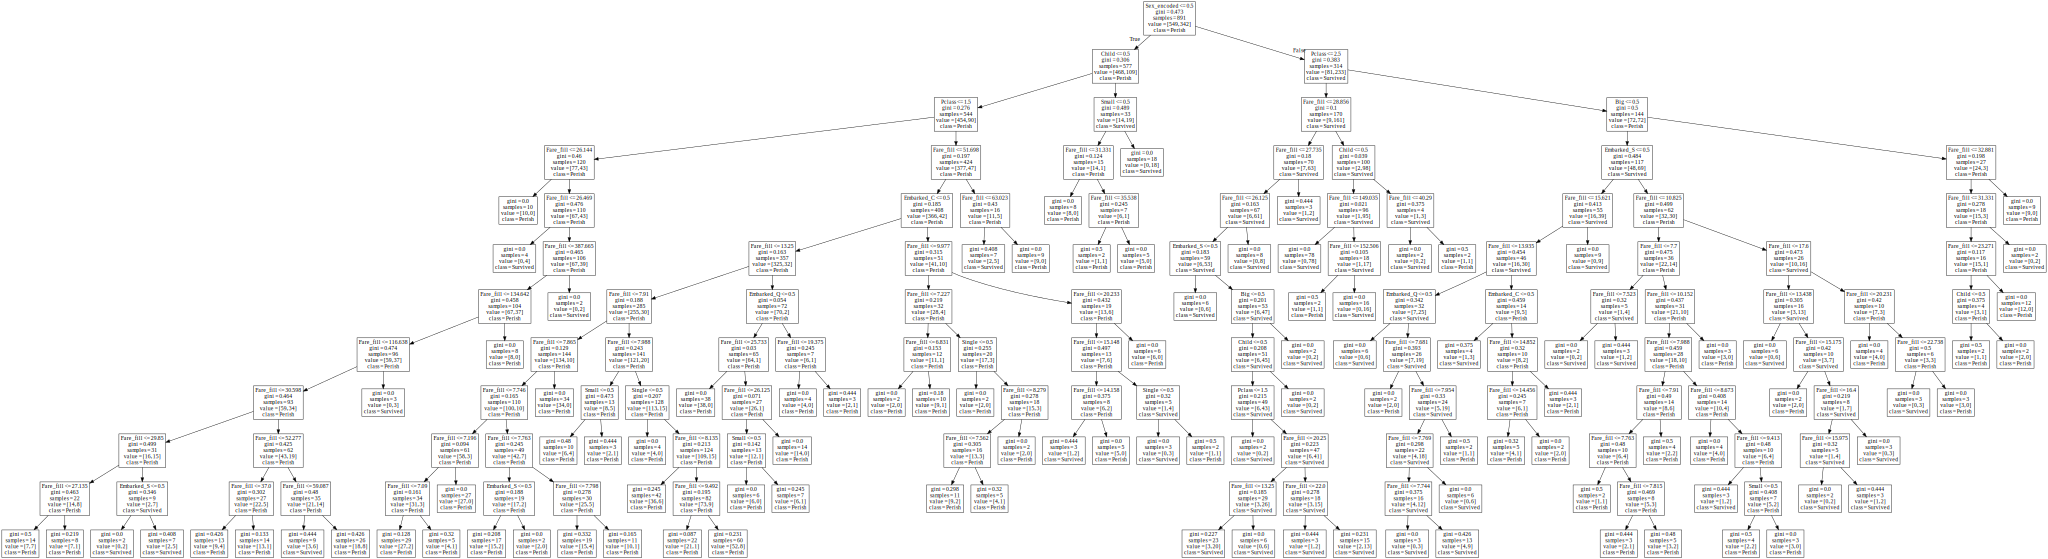

In [100]:
import graphviz
# scikit-learn(줄여서 sklearn)의 tree 모듈에서 Decision Tree를 시각화 할 수 있는 export_graphviz를 가져옵니다.
from sklearn.tree import export_graphviz

# export_graphviz로 Decision Tree를 시각화합니다. 시각화 할 때는 다음의 옵션이 들어갑니다.
# 1) model. 시각화할 트리(Decision Tree) 입니다.
# 2) feature_names. 트리를 만들 때 사용한 feature들의 이름입니다.
# 3) class_names. 살았을 경우 시각화에서 어떻게 표현할 것인지(Survived), 반대로 죽었을 경우 시각화에서 어떻게 표현할 것인지(Perish)를 알려줍니다.
# 4) out_file. 시각화 겨롸를 저장할 파일명입니다. 이번에는 파일로 저장하지 않고 바로 쥬피터 노트북에 띄울 생각이므로 None을 주면 됩니다.
# 마지막으로 시각화한 결과를 dot_tree라는 이름의 변수에 저장합니다.

dot_tree = export_graphviz(model,
                           feature_names = feature,
                           class_names = ["Perish", "Survived"],
                           out_file = None)
graphviz.Source(dot_tree).render(filename = 'tree.png') # Save file tree.png
graphviz.Source(dot_tree) # Display result

## Predict

Decision Tree가 성공적으로 학습이 되었다면, 남은 것은 이 Decision Tree를 활용해 테스트 데이터에 있는 승객의 생존/사망 여부를 예측하는 것입니다. 예측은 ```model.predict```로 할 수 있으며, 이 때 test 데이터의 feature인 X_test가 필요합니다.

In [101]:
predictions = model.predict(x_test)

print(predictions.shape)
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

## Submit

Decision Tree의 fit과 predict 를 통해 우리는 test 데이터에 있는 승객의 생존 여부(Survived)를 예측하였습니다. 이제 우리에게 남은 건 이를 캐글([kaggle](http://kaggle.com/))이 권장하는 제출(submission) 포멧에 맞게 정리한 뒤 파일로 저장하는 것입니다.

캐글의 타이타닉 경진대회([Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic))에서는 **gender_submission.csv**라는 제출 포멧을 제공합니다. ([다운로드 링크](https://www.kaggle.com/c/titanic/data)) 우리는 우리가 예측한 값을 이 제출 포멧에 맞게 집어넣고 저장할 것입니다.

In [107]:
submission = pd.read_csv("gender_submission.csv", index_col = "PassengerId")

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [108]:
submission["Survived"] = predictions
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [110]:
submission.to_csv("decision_tree.csv")